# Análise exploratória de dados

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Descrição dos dados



|Variável|Descrição|Tipo|Subtipo|Valores|
|--------|---------|----|-------|-------|
|survival|Indica se a pessoa sobreviveu|Qualitativa|Binária|0, 1|
|pclass|Indica a classe do bilhete|Qualitativa|Ordinal|1, 2, 3|
|sex|Indica o sexo da pessoa|Qualitativa|Nominal|male, female|
|age|Indica a idade da pessoa|Quantitativa|Discreta|0 -> 89'|
|sibsp|Número de irmãos ou esposas a bordo|Quantitativa|Discreta||
|parch|Número de pais/crianças a bordo|Quantitativa|Discreta||
|fare|Valor pago na passagem|Quantitativa|Continua||
|embark|Indica em qual porto a pessoa embarcou|Inútil|Nominal|C = Cherbourg, Q = Queenstown, S = Southampton|
|class|Indica a classe do bilhete|Inútil|Ordinal|First, Second, Thrid|
|who|Indica se é homem, mulher ou criança|Qualitativa|Nominal|man, woman, child|
|adult_male|Indica se a pessoa é um homem adulto|Qualitativa|Booleana|True/False|
|deck|Indica|Qualitativa|Nominal|C, E, G, D, A, B, F, nan|
|embark_town|Indica a cidade que a pessoa embarcou|Qualitativa|Nominal|Southampton, Queenstown, Cherbourg, nan|
|alive|Indica se a pessoa sobreviveu ou não|Inútil|Nominal|Yes/No|
|alone|Indica se a pessoa viajou sozinha|Qualitativa|Booleana|True/False|

In [2]:
data = pd.read_csv('../data/raw/data_titanic.csv')

In [3]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Dados



In [4]:
data.shape

(891, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Percepções Iniciais

A análise preliminar do conjunto de dados mostra que:

* A maior parte das pessoas tinham 40 anos ou menos, portanto eram jovens. Metade das pessoas tinham 28 anos ou menos.
* Metade dos passageiros pagaram 14,45 doláres ou menos pela passagem. A passagem de maior valor foi de 512 dólares, o que pode ser entendido como um outlier

O conjunto de dados possui 891 registros. Porém alguns atributos possuem dados faltantes, a saber:

* age: 714/891,
* embarked: 889/891,
* deck: 203/891,
* embark_town: 889/891

Além disso, temos uma coluna que possuem informações duplicadas:

* embarked e embark_town

E por fim tem-se uma coluna cuja informação pode ser obtida de outras duas colunas, porém ela é mais completa:

* adult_male (891 registros) que pode vir de sex (891 registros e age (714 registros).

Sendo assim, as análises posteriores não irão considerar essas colunas.

## 2. Perguntas de partida e hipóteses

As perguntas de partida para esse conjunto de dados são:

1) A classe que o passeiro estava foi relevante para sobrevivência?
2) O sexo do passeiro foi relevante para a sobrevivência?
3) Ser um homem adulto foi relevante para a sobrevivência?
4) O lugar de embarque tem correlação com a classe do passageiro?

As hipóteses que vou considerar são:

1) A maior parte dos passageiros sobreviventes foram de classe mais alta,
2) O sexo do passageiro foi relevante para a sobrevivência. Acredito que mais homens tenham sobrevivido.
3) O lugar de embarque tem correlação com a classe do passageiro.


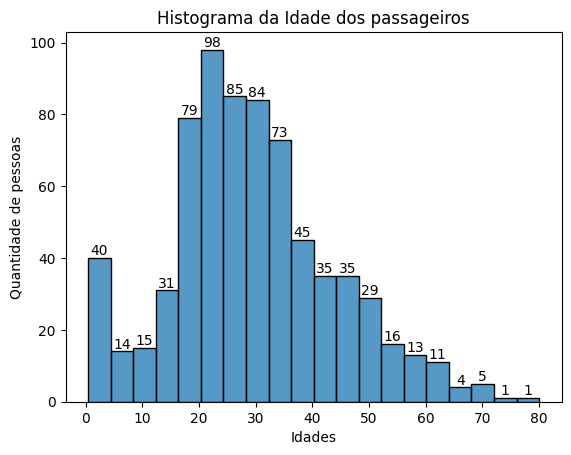

In [7]:
ax = sns.histplot(data=data, x='age')
ax.bar_label(ax.containers[0])
plt.title("Histograma da Idade dos passageiros")
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idades')
plt.show()

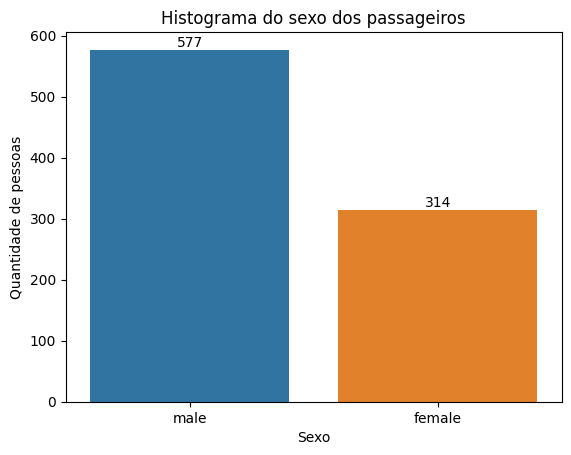

In [8]:
ax = sns.countplot(data=data, x='sex')
ax.bar_label(ax.containers[0])
plt.title("Histograma do sexo dos passageiros")
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Sexo')
plt.show()

Podemos observar que a maior parte dos passageiros era homem.

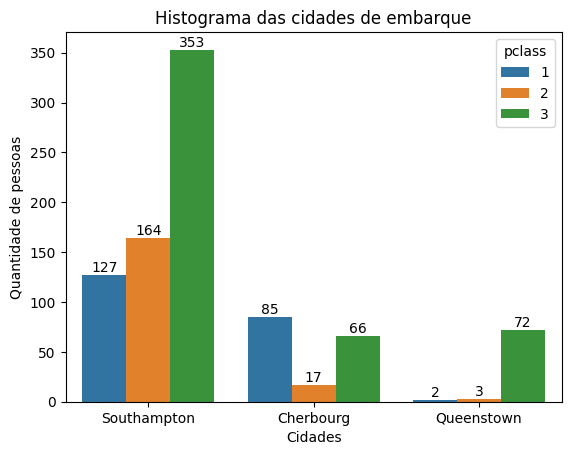

In [9]:
ax = sns.countplot(data=data, x='embark_town', hue='pclass')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Histograma das cidades de embarque")
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Cidades')
plt.show()

Aparentemente, Cherbourg tem maior quantidade (proporcionalmente) de pessoas de primeira classe, o que pode indicar ser o local mais "rico". Vamos calcular a proporção da classe 1 por local

In [10]:
southampton = 127/(127+164+353) * 100
cherbourg = 85/(85+17+66) * 100
queenstown = 2 / (2+3+72) * 100
print(f'Proporção de pessoa na primeira classe\nSouthampton: {southampton:.2f}%\nCherbourg: {cherbourg:.2f}%\nQueenstown: {queenstown:.2f}%')

Proporção de pessoa na primeira classe
Southampton: 19.72%
Cherbourg: 50.60%
Queenstown: 2.60%


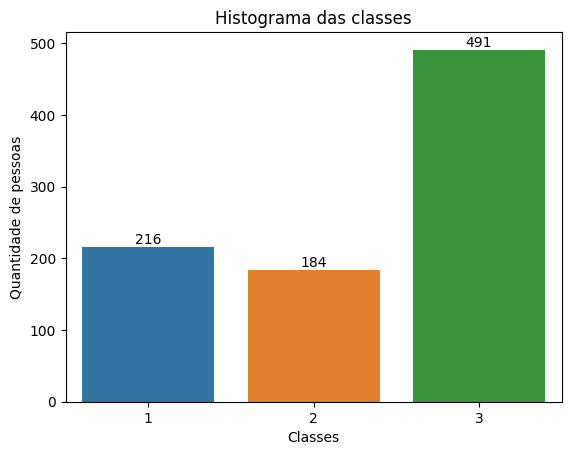

In [11]:
ax = sns.countplot(data=data, x='pclass')
ax.bar_label(ax.containers[0])
plt.title("Histograma das classes")
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classes')
plt.show()

In [12]:
passenger_per_class = data['pclass'].value_counts(normalize=True) * 100
print(passenger_per_class)

3    55.106622
1    24.242424
2    20.650954
Name: pclass, dtype: float64


Repare que entre os passageiros:
* **55,1%** era da classe 3 (Third Class),
* **24,24%** era da classe 1 (First Class),
* **20,65** era da classe 2 (Second Class).

In [13]:
data_survivor = data[data['survived'] == 1]
data_survivor.shape

(342, 15)

Podemos ver que 342 pessoas sobreviveram.

In [14]:
passenger_per_class = data_survivor['pclass'].value_counts(normalize=True) * 100
print(passenger_per_class)

1    39.766082
3    34.795322
2    25.438596
Name: pclass, dtype: float64


Dos sobreviventes, temos que:

* **39,8%** eram da primeira classe,
* **34,8%** eram da terceira classe,
* **25,4%** eram da segunda classe.

Podemos, então ter a seguinte comparação:

* A primeira classe contava com 24,2% passageiros e 39,8% dos sobreviventes,
* A segunda classe contava com 20,7% dos passageiros e 25,4% dos sobreviventes,
* A terceira classe contava com 55,1% dos passageiros e 34,8% dos sobreviventes.

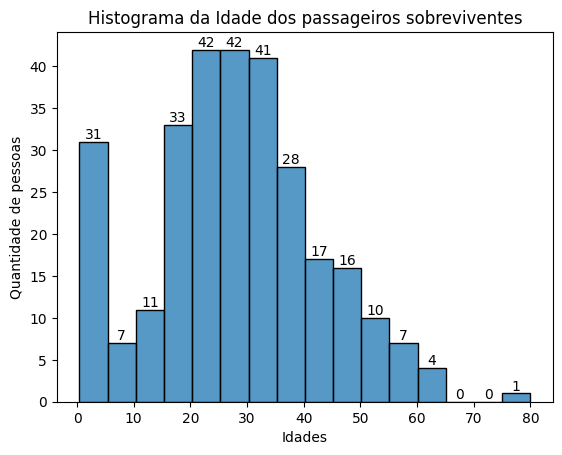

In [15]:
ax = sns.histplot(data=data_survivor, x='age')
ax.bar_label(ax.containers[0])
plt.title("Histograma da Idade dos passageiros sobreviventes")
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idades')
plt.show()

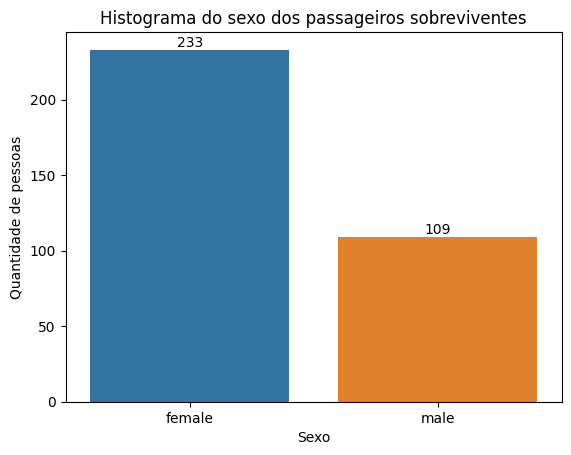

In [16]:
ax = sns.countplot(data=data_survivor, x='sex')
ax.bar_label(ax.containers[0])
plt.title("Histograma do sexo dos passageiros sobreviventes")
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Sexo')
plt.show()

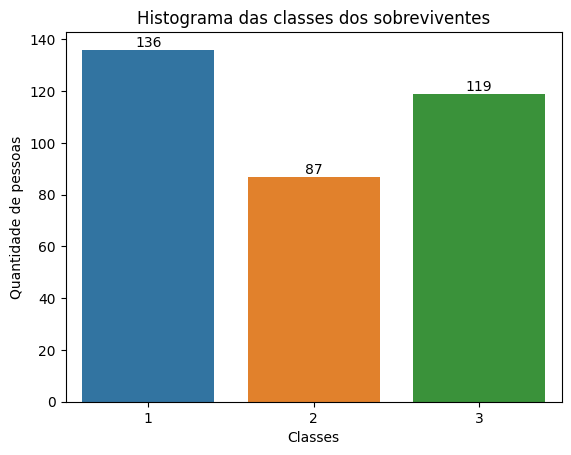

In [17]:
ax = sns.countplot(data=data_survivor, x='pclass')
ax.bar_label(ax.containers[0])
plt.title("Histograma das classes dos sobreviventes")
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classes')
plt.show()

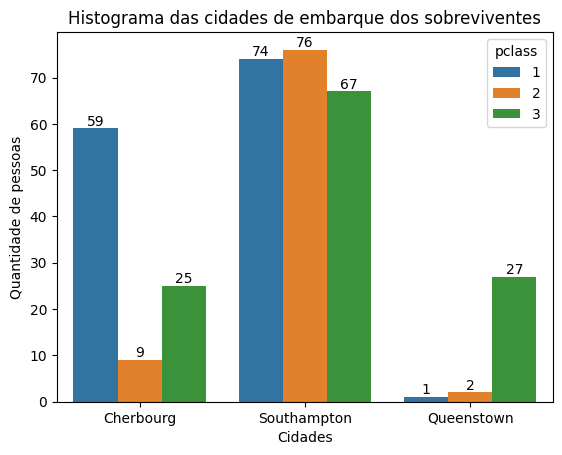

In [18]:
ax = sns.countplot(data=data_survivor, x='embark_town', hue='pclass')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Histograma das cidades de embarque dos sobreviventes")
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Cidades')
plt.show()

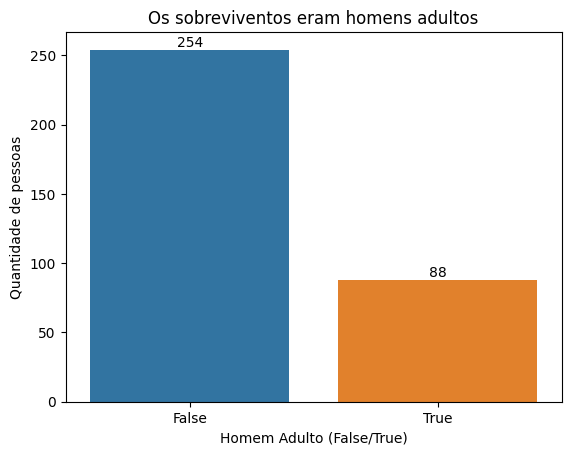

In [19]:
ax = sns.countplot(data=data_survivor, x='adult_male')
ax.bar_label(ax.containers[0])
plt.title("Os sobreviventos eram homens adultos")
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Homem Adulto (False/True)')
plt.show()

## 3. Insights

Os insights que tirei foram:

* Ser um homem adulto não foi um fator decisivo na sobrevivência,
* Mais mulheres sobreviveram do que homens (o dobro), apesar de ter mais passageiros homens do que mulheres (1,83 vezes mais),
* Dos homens sobreviventes, 20% não era adulto
* Proporcionalmente, sobreviveram mais pessoas da primeira classe